In [15]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import cv2
import random
from PIL import Image


In [16]:
def pca(date_mat, max_rank=200):
    date_mat = np.float32(np.mat(date_mat))
    mean_value = np.mean(date_mat, axis=0)
    mean_removed = date_mat - mean_value
    # cov_mat = mean_removed * mean_removed.T
    # print(mean_removed.shape)
    cov_mat = np.cov(mean_removed, rowvar=0)
    # print(cov_mat.shape)
    eig_vals, eig_vects = np.linalg.eig(cov_mat)
    sort_vals = np.argsort(eig_vals)
    select_vals = sort_vals[: -(max_rank + 1): -1]
    select_vects = eig_vects[:, select_vals]
    # select_vects = mean_removed.T * select_vects
    lowD = mean_removed * select_vects
    return lowD, select_vects, mean_value

In [17]:
def knn(inX, dataSet, labels, k):
    inX = np.array(inX)
    dataSet = np.array(dataSet)
    labels = np.array(labels)

    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance ** 0.5
    sorteedDisttTndices = distance.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteedDisttTndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(
        classCount.items(), key=lambda d: d[1], reverse=True)
    return sortedClassCount[0][0]

In [18]:
def loadImage(image_path):
    # print(image_path)
    image = Image.open(image_path)
    image = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)
#     print(image.shape)
    image = cv2.resize(image, None, fx=0.065, fy=0.065)
#     print(image.shape)
    image = image.flatten()
    # print(image.shape)
    return image

In [19]:
def loadData(test_image_path, data_path="yalefaces/yalefaces/"):
    train_data = []
    train_lable = []
    test_data = []
    face_label = ["centerlight", "glasses", "happy", "leftlight", "noglasses", "normal",
                  "rightlight", "sad", "sleepy", "surprised", "wink"]
    test_data.append(loadImage(test_image_path))
    for i in range(1, 16):
        train_path = data_path + "subject" 
        if i < 10:
            train_path += '0'
        train_path += str(i)
        for label in face_label:
            train_image_path = train_path + '.'+ label + ".gif"
        if test_image_path == train_image_path:
            continue
        # print(train_image_path)
        train_data.append(loadImage(train_image_path))
        train_lable.append(train_image_path)
    return train_data, train_lable, test_data

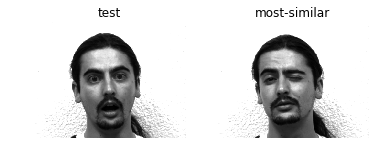

In [20]:
def main():
    face_label = ["centerlight", "glasses", "happy", "leftlight", "noglasses", "normal",
                  "rightlight", "sad", "sleepy", "surprised", "wink"]
    person = random.randint(1, 15)
    picture = random.randint(0, 10)
    test_face = "yalefaces/yalefaces/subject" 
    if person < 10:
        test_face += '0'
    test_face += str(person) + "." + face_label[picture] + ".gif"

    train_data, train_lable, test_data = loadData(test_face)
    lowD, select_vects, mean_value = pca(train_data, max_rank=500)
    test_data -= mean_value
    test_data = np.mat(test_data) * np.mat(select_vects)
    best_match = knn(test_data, lowD, train_lable, 1)

    image = np.array(Image.open(test_face))
    image2 = np.array(Image.open(best_match))
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("test")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap="gray")
    plt.title("most-similar")
    # 隐藏坐标系
    plt.axis('off')
    # 展示图片
    plt.show()
    # image = cv2.imread('orl_faces/s1/1.pgm', -1)
    # print(image)
main()